# Modelling A Duotransit (TOI1471)

Let's run through how to model a duotransit example.

NB, `MonoTools` also allows "trios" where there are three transits but no unique period yet (replace `add_duo` with `add_trio`)

In [1]:
%load_ext autoreload
%autoreload 2

from MonoTools.MonoTools import fit,lightcurve
import numpy as np

#### Getting the lightcurve, and forcing it to use raw flux, as the PDC detrending is compromised:

In [2]:
lc = lightcurve.multilc(306263608, 'tess', load=False)
#Make sure force_raw_flux=False for the majority of other cases

Getting all IDs
Accessing online catalogues to match ID to RA/Dec (may be slow) mission= tess
Sector 64 not (yet) found on MAST | RESPONCE:404
Sector 64 not (yet) found on MAST | RESPONCE:404
Sector 65 not (yet) found on MAST | RESPONCE:404


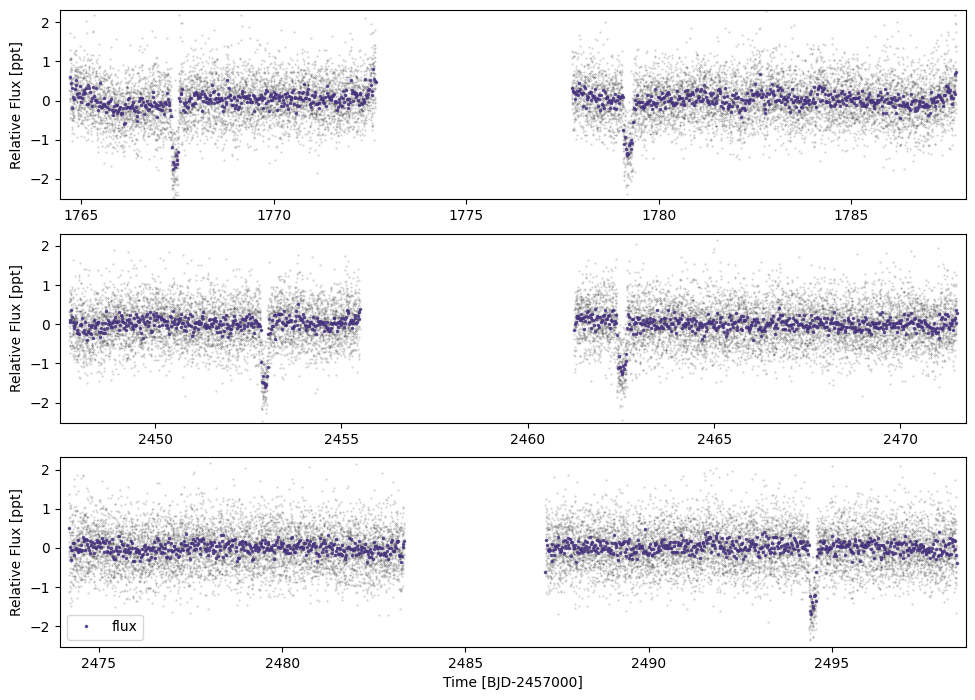

In [3]:
lc.plot()

#### Creating the MonoTools model:

In [7]:
model = fit.monoModel("TOI1471", 'tess', lc=lc)

In [8]:
# Adding stellar parameters:
model.init_starpars()

#### Adding each of the inner planets:

In [9]:
model.add_planet('multi',{'tcen':1767.42089,'period':20.772907,'period_err':0.005,
                          'tdur':0.2,'depth':1.8e-3},'b')

In [10]:
model.add_planet('duo',{'tcen':1779.19,'tcen_2':2462.52,
                        'tdur':0.27,'depth':1.2e-3},'c')

#### Initialising the model:

In [11]:
model.init_model(use_GP=True, bin_oot=True)

initialising and training the GP


optimizing logp for variables: [phot_mean, phot_w0, phot_power, logs2]


message: Optimization terminated successfully.
logp: -15.199319449931737 -> -1.939663676885738
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [phot_power, phot_w0, logs2, phot_mean]


Sampling 2 chains for 594 tune and 900 draw iterations (1_188 + 1_800 draws total) took 0 seconds.


initialised priors
initialised planet info
Intiialised everything. Optimizing


If you're interested to know where your model/plots/etc are being stored, check the `GetSavename` command or `savenames` parameter

In [12]:
model.GetSavename(how='save', overwrite=None)

#### Plotting the minimised model:

initialising transit
Initalising Transit models for plotting with n_samp= 10
Initalising GP models for plotting with n_samp= 1
successfully interpolated GP means


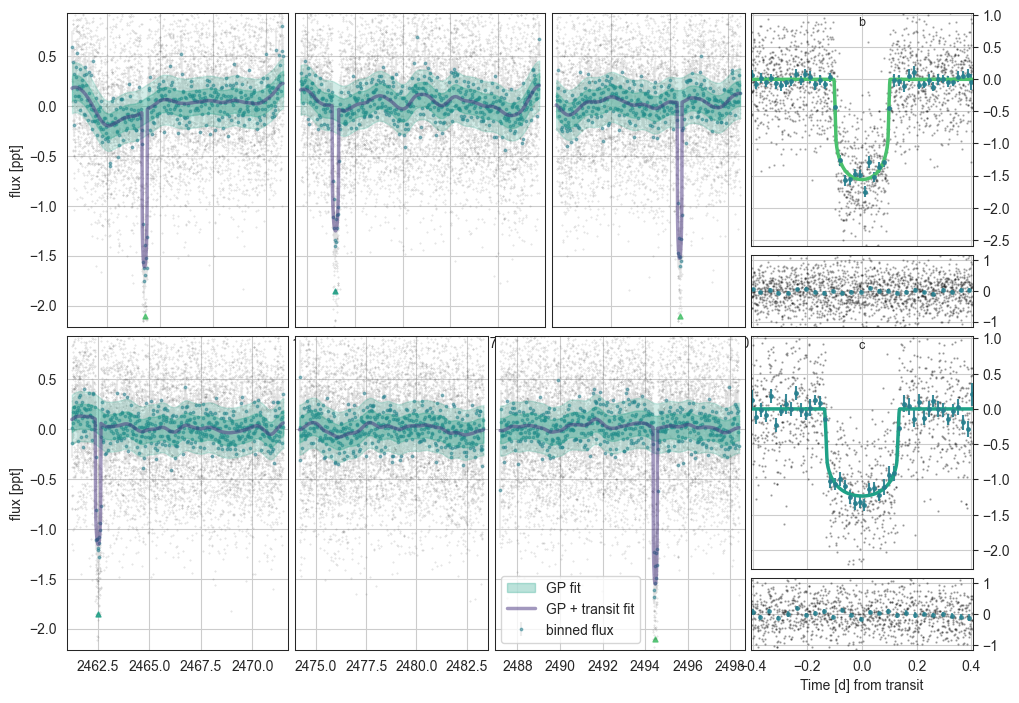

In [13]:
model.Plot()

#### Looks good. Let's run the Mcmc

M1/M2 macs might need to set n_chains=1

In [15]:
model.SampleModel(n_burn_in=300,n_draws=800,n_chains=1)

Sequential sampling (1 chains in 1 job)
NUTS: [phot_mean, phot_power, phot_w0, logs2, u_star_tess, tdur_c, b_c, logror_c, t0_2_c, t0_c, b_b, omega_b, ecc_b_frac, ecc_b_sigma_rayleigh, ecc_b_sigma_gauss, ecc_b, logror_b, per_b, t0_b, Rs, logrho_S]


Sampling 1 chain for 300 tune and 800 draw iterations (300 + 800 draws total) took 1330 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 800), minimum_shape: (chains=2, draws=4)


Saving sampled model parameters to file with shape:  (316, 14)


#### Saving the model and creating various plots:

In [16]:
model.SaveModelToFile()

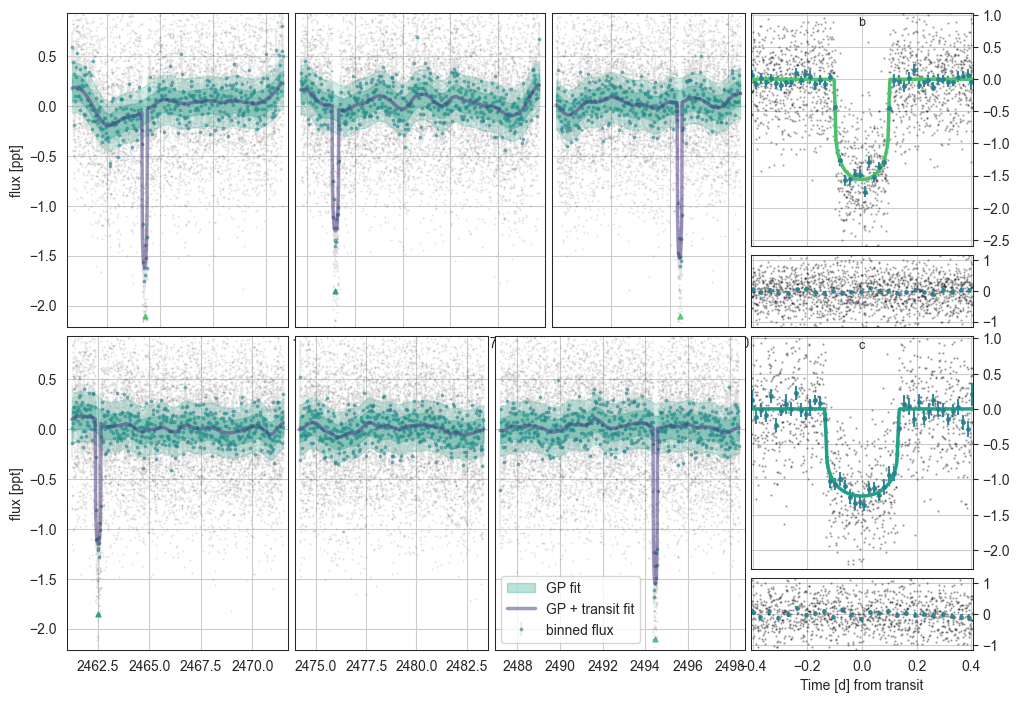

In [17]:
#Interactive plot:
model.Plot()

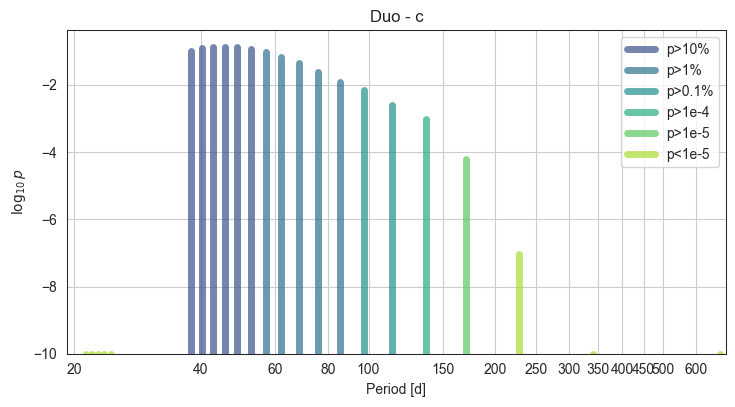

In [22]:
#Period plot:
model.PlotPeriods(ylog=True,ymin=-10,xlog=True)

In [23]:
#Getting the table of output model parameters:
df=model.MakeTable(short=True,save=True)

Got error No model on context stack. trying to find log_likelihood in translation.
arviz - WARNING - Shape validation failed: input_shape: (1, 800), minimum_shape: (chains=2, draws=4)


Saving sampled model parameters to file with shape:  (316, 14)


In [24]:
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,5%,-$1\sigma$,median,+$1\sigma$,95%
Rs[0],0.96568,0.04516,0.87673,1.04714,0.00150,0.00106,912.70849,635.62839,NaN,0.88626,0.92245,0.96613,1.01098,1.04077
per_b,20.77289,0.00004,20.77280,20.77296,0.00000,0.00000,1043.94018,727.11578,NaN,20.77282,20.77284,20.77289,20.77293,20.77296
logs2[0],-5.07547,0.09668,-5.24879,-4.89481,0.00321,0.00227,910.77795,742.76918,NaN,-5.23852,-5.17137,-5.07657,-4.97699,-4.92015
rho_S,1.06089,0.15505,0.73545,1.32346,0.01217,0.00862,160.48725,481.84722,NaN,0.81894,0.90247,1.05863,1.20218,1.32977
Ms[0],0.96220,0.19855,0.61415,1.34385,0.00964,0.00682,422.41919,678.25204,NaN,0.66668,0.76834,0.94507,1.14669,1.31825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
logprob_c[22],-309.99999,0.00001,-310.00000,-309.99997,0.00000,0.00000,887.88984,526.00247,NaN,-310.00000,-309.99999,-309.99999,-309.99998,-309.99997
ecc_c,0.70101,0.03353,0.63976,0.76043,0.00194,0.00141,246.11941,515.32555,NaN,0.64203,0.67216,0.70626,0.72860,0.74726
ecc_marg_c,0.70101,0.03353,0.63976,0.76043,0.00194,0.00141,246.11941,515.32555,NaN,0.64203,0.67216,0.70626,0.72860,0.74726
vel_marg_c,0.99170,0.02078,0.97259,1.03651,0.00095,0.00067,353.58286,564.09737,NaN,0.97485,0.97637,0.98345,1.00668,1.03798
